# Zillow Single Family Prediction Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("./util_")

import stats_test_
import modeling_

## Goal

- Main Drivers that predicts single family home value.
- Linear regression model to make predictions.

## Acquire

I am using the Zillow churn data from the Codeup database.

- Query the following columns:
    - `bedroomcnt, bathroomcnt,calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips`

- 2152863 rows and 7 columns.
- 7 numeric and 0 object
- 22778 total null count (1% of the data)

## Prepare

- Remove all nulls (1% of the data)
- Remove duplicated rows.
- convert data type from float to int (bedrooms, bathrooms)
- remove outliers (1809680 rows left)
- replace the fips code with county names and Encode county column.
- Split data into train, validate, and test. (`60/20/20 ` split)
- scale the numeric categorical and continuous variables and extract a copy of the original data frame.
    - `bedrooms, bathrooms, sqr_feet, year_built,`

## Data Dictionary

| Column Name | Description |
| ----------- | ----------- |
| bedrooms | The number of bedrooms in the property. Bedrooms refer to individual rooms used primarily for sleeping and are typically found in residential properties. |
| bathrooms | The number of bathrooms in the property. Bathrooms refer to rooms containing a toilet, sink, and typically a bathtub or shower, used for personal hygiene. |
| sqr_feet | The total square footage of the property. Square footage is a measurement of the area covered by the property, indicating its size or living space. It is often used to estimate the property's value or to determine the price per square foot. |
| tax_value | The assessed value of the property for tax purposes. Tax value represents the estimated worth of the property as determined by the local tax authority. It is used to calculate property taxes. |
| year_built | The year in which the property was constructed or built. This indicates the age of the property and can be useful in assessing its condition or historical significance. |
| tax_amount | The amount of tax owed on the property. Tax amount refers to the actual dollar amount that needs to be paid in property taxes based on the assessed tax value and local tax rates. |
| county | The county where the property is located. County refers to a specific geographic region or administrative division within a state or country. It helps identify the property's location within a broader jurisdiction. |


## Explore

- Strong relationship between square feet and tax value

**1. Does the mean tax value differ significantly between properties with different square footage**

Null_Hyp: The mean tax value differ significantly between properties with different square footage

Alt_Hyp: The mean tax value does not differ significantly between properties with different square footage


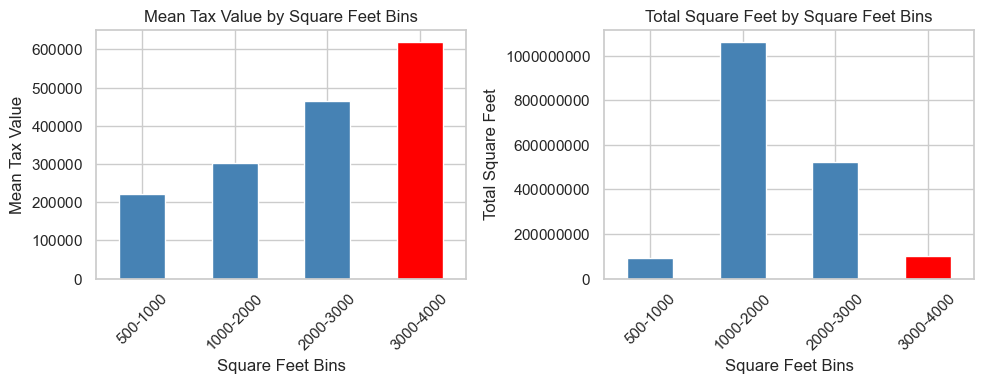

In [2]:
# get the visual from stats_test file
stats_test_.mean_tax_value_vs_sqr_feet()

    - `We reject the null hypothesis`
    
- The test says that the mean tax value does not differ significantly between properties with different square footage.

- Moderate a relationship between bedrooms and tax value.
- Weak relationship between bedrooms and tax value.


**2. Is there a significant difference in the mean tax value between properties with low numbers of bedrooms or bathrooms against the properties with high numbers of bedrooms or bathrooms.**

Null_Hyp: There is a significant difference in the mean tax value between properties with low numbers of bedrooms or bathrooms against the properties with high numbers of bedrooms or bathrooms

Alt_Hyp: There is no a significant difference in the mean tax value between properties with low numbers of bedrooms or bathrooms against the properties with high numbers of bedrooms or bathrooms


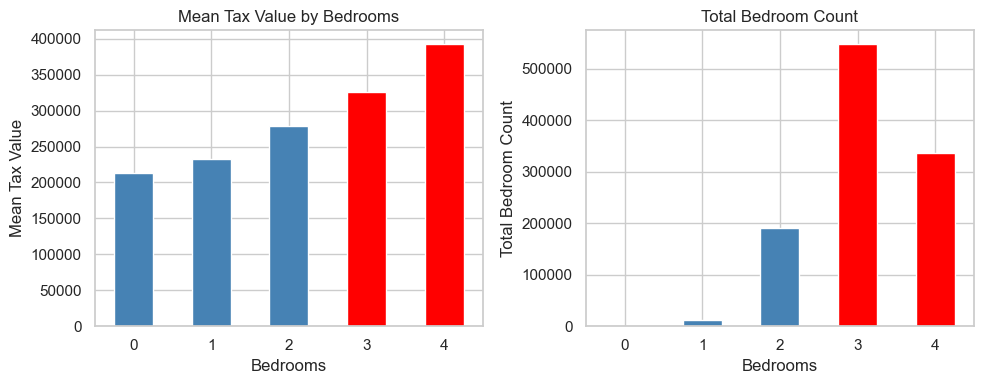

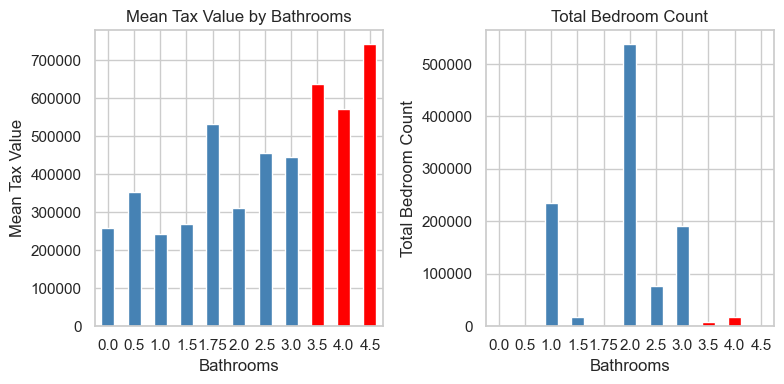

In [3]:
# get the visual from stats_test file
stats_test_.mean_tax_value_vs_bed_bath_rooms()

    - `We fail to reject the null hypothesis`

- The test says that there is a `significant difference` in the mean tax value between properties with low numbers of bedrooms or bathrooms against the properties with high numbers of bedrooms or bathrooms.

- very weak relationship between county and tax value.

**1. Does the mean tax value differ significantly between properties in Los Angeles compared to the other counties?**

Null_Hyp: The mean tax value differ significantly between properties in Los Angeles County compared to the other counties?

Alt_Hyp: The mean tax value does not differ significantly between properties in Los Angeles County compared to the other counties?


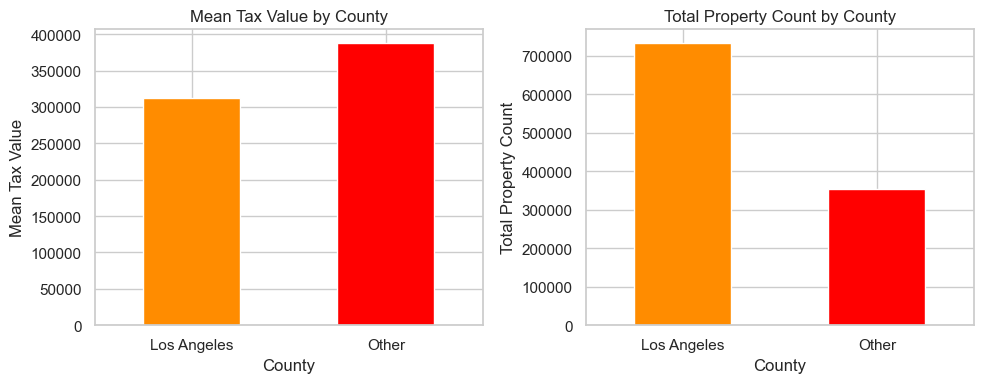

In [4]:
# get the visual from stats_test file
stats_test_.mean_tax_value_vs_county()

    - `We reject the null hypothesis`
    
- Test show that the mean tax value does not differ significantly between properties in Los Angeles County compared to the other counties?

### Explore Summary

- The test says that the mean tax value does not differ significantly between properties with different square footage.

- The test says that there is a significant difference in the mean tax value between properties with low numbers of bedrooms or bathrooms against the properties with high numbers of bedrooms or bathrooms.

- Test show that the mean tax value does not differ significantly between properties in Los Angeles County compared to the other counties.

- We have data to say that there is not a significant difference in the mean tax value between properties built in different years.

## Modeling

**Model features**

- `bedroom, bathroom,square_feet, year_built, county`
    
**Baseline RMSE**

- mean basline: `212157.5`


### Linear Regression (OLS)

In [2]:
modeling_.get_ols()

,RMSE Training,RMSE Validation,train validate RMSE diff,val baseline diff,R2_validate
0,187043.682794,187376.121784,332.43899,-24781.374802,0.223312


### LassoLars

In [3]:
modeling_.get_lossa_lars()

,RMSE Training,RMSE Validation,RMSE baseline,train validate RMSE diff,val baseline diff,R2_validate
0,187043.648255,187376.604923,212157.496587,332.956667,-24780.891664,0.223308


### TweedieRegressor (GLM:Generalized Linear Model)

In [4]:
modeling_.get_tweedie()

,RMSE Training,RMSE Validation,RMSE baseline,train validate RMSE diff,val baseline diff,R2_validate
0,187251.250752,187565.82391,212157.496587,314.573157,-24591.672677,0.221739


### Cubuc linear Model

In [5]:
modeling_.get_poly_predictions()

,RMSE Training,RMSE Validation,RMSE baseline,train validate RMSE diff,val baseline diff,R2_validate
0,183837.832339,184170.374661,212157.496587,332.542322,-27987.121926,0.24966


### Test the Cubic Linear Model

In [6]:
modeling_.get_best_model()

,RMSE Training,RMSE test,RMSE baseline,train test RMSE diff,test baseline diff,R2 test
0,187251.250752,187507.594161,212157.496587,256.343408,-24649.902426,0.222059


### Comparing Models

| Model | Validation RMSE | R<sup>2</sup> Value |
| ---- | ----| ---- |
| Baseline | 288337.85 ||
| Linear Regression (OLS) | 235138.62 |0.33|  
| Tweedie Regressor (GLM) | 236127.92 |0.33|  
| Lasso Lars | 235138.92 |0.33|  
| Cubic Regression | 229364.37 |0.37| 

## Conclusion

### Explore

- The test says that the mean tax value does not differ significantly between properties with different square footage.

- The test says that there is a significant difference in the mean tax value between properties with low numbers of bedrooms or bathrooms against the properties with high numbers of bedrooms or bathrooms.

- Test show that the mean tax value does not differ significantly between properties in Los Angeles County compared to the other counties.

- We have data to say that there is not a significant difference in the mean tax value between properties built in different years.

### Modeling

The final (Tweedie Regressor) model performed slightly better than the baseline by about $24,649.90.

- Bedrooms, bathrooms, square feet, year built, and county seems to be moderate drivers for predicting tax value.

### Recommendations

Some properties have a much higher value than others when they are located so close to each other mostly due to the size, and the number of rooms in the house. So to better predict home value we should look father into the condition of the house and identify a unique indoor or outdoor feature that some homes have that makes them worth more or less to the current housing market.

**Where to build**

I recommend building in Orange or Ventura County on a minimum lot size of 2000 square feet. A single-family home containing at least 3 bedrooms and at least two bathrooms. This will help maximize your profit when it's time for you to sell.

### Next Steps

- Collect better data on current home conditions.